<a href="https://colab.research.google.com/github/PearlCoastal/Machine-Learning/blob/master/DecisionTree_vs_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Here are my source code and discussion under the results compared between Decision Tree and SVM.


In [32]:
import pandas as pd

#I am using the dataset named "penguin".

#Using species island culumen and flipper to check whether the penguin is a male or a female

url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"

df = pd.read_csv(url)

# The initial dataset contains "species", "island" and "sex" which are string and I've transformed them into float using "replace"

# First Step: Data pre-processing procedure

# Like in species there are three kinds : "Adelie, Chinstrap, Gentoo", and they are in "string"so I replace it with "0,1,2" which is in "float"

# The island and sex are pre-processed as the same

# species
df = df.replace({'Adelie' : 0, 'Chinstrap' : 1, 'Gentoo' : 2})

# island
df = df.replace({'Torgersen':0,'Dream':1,'Gentoo':2,'Biscoe':3})

# sex
df = df.replace({'MALE' : 0, 'FEMALE' : 1})


# Because there are several missing values in penguin dataset as showing like "NaN"
# so I use the dropna function in order to drop those missing indices.

df.dropna(subset = ['sex'], inplace = True)

df

# here are my pre-processed dataset

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,0,39.1,18.7,181.0,3750.0,0.0
1,0,0,39.5,17.4,186.0,3800.0,1.0
2,0,0,40.3,18.0,195.0,3250.0,1.0
4,0,0,36.7,19.3,193.0,3450.0,1.0
5,0,0,39.3,20.6,190.0,3650.0,0.0
...,...,...,...,...,...,...,...
338,2,3,47.2,13.7,214.0,4925.0,1.0
340,2,3,46.8,14.3,215.0,4850.0,1.0
341,2,3,50.4,15.7,222.0,5750.0,0.0
342,2,3,45.2,14.8,212.0,5200.0,1.0


In [60]:
from sklearn.model_selection import train_test_split

# using 'species', 'island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g' as training feature
feature = df.loc[:,['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# supervised machine learning

# 'sex' as label
target = df.loc[:,['sex']]


# seperate dataset

# training data and test data are divided as 8/10 and 2/10

# random state

x_feature, y_feature, x_target, y_target = train_test_split(feature, target, train_size=0.8, random_state=2)

x_feature

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
66,0,3,35.5,16.2,195.0,3350.0
132,0,1,36.8,18.5,193.0,3500.0
247,2,3,47.8,15.0,215.0,5650.0
189,1,1,52.0,20.7,210.0,4800.0
265,2,3,43.6,13.9,217.0,4900.0
...,...,...,...,...,...,...
307,2,3,51.3,14.2,218.0,5300.0
27,0,3,40.5,17.9,187.0,3200.0
78,0,0,36.2,16.1,187.0,3550.0
20,0,3,37.8,18.3,174.0,3400.0


In [53]:
print("I choosed Decision Tree and Supporting Vector Machine as my supervised Machine Learning methods")

I choosed Decision Tree and Supporting Vector Machine as my supervised Machine Learning methods


Train the data using Decision Tree
Decision Tree is like below


array([[28,  0],
       [ 4, 35]])

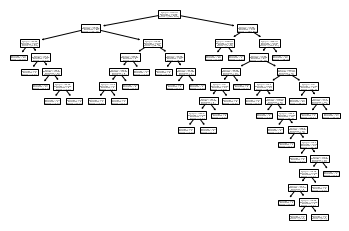

In [61]:
# Using Decison Tree
# construct a tree as below

from sklearn import tree

print("Train the data using Decision Tree")


# entropy is the expected value of information amount
# when entropy is high,its difficlut to seperate
# while entropy is low, its good
clf = tree.DecisionTreeClassifier(criterion='entropy')

clf=clf.fit(x_feature, x_target)
 
# Show the trained tree using plot function

print("Decision Tree is like below")

tree.plot_tree(clf) 

predicted_DT = clf.predict(y_feature)

from sklearn.metrics import confusion_matrix

# confusion matrix
confusion_matrix(y_target,predicted_DT)



In [62]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


print("Results of Decision Tree")

print('Accuracy = ', accuracy_score(y_target, predicted_DT))

print('Precision = ', precision_score(y_target, predicted_DT))

print('Recall = ', recall_score(y_target, predicted_DT))

print('F1 score = ', f1_score(y_target, predicted_DT))

Results of Decision Tree
Accuracy =  0.9402985074626866
Precision =  1.0
Recall =  0.8974358974358975
F1 score =  0.945945945945946


In [63]:
# using SVM

print("Train the data using SVM")

from sklearn import svm

clf = svm.SVC()

clf.fit(x_feature, x_target)

predicted_SVM = clf.predict(y_feature)

from sklearn.metrics import confusion_matrix

confusion_matrix(y_target, predicted_SVM)

Train the data using SVM


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[19,  9],
       [13, 26]])

In [64]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print("Results of SVM")

print('Accuracy = ', accuracy_score(y_target, predicted_SVM))

print('Precision = ', precision_score(y_target, predicted_SVM))

print('Recall = ', recall_score(y_target, predicted_SVM))

print('F1 score = ', f1_score(y_target, predicted_SVM))

Results of SVM
Accuracy =  0.6716417910447762
Precision =  0.7428571428571429
Recall =  0.6666666666666666
F1 score =  0.7027027027027027




# About
---


1.   **Discussion**
  
  Discison Tree is easily to interpret, and easily to be trained.

  And because there are several missing values in 'penguin' dataset, and Decision Tree is good dealing with dataset with missing values.
  
  SVM are supervised models with associated learning algorithm that analyze data used for classification and regression analysis, based on the statistical learning framework.

  An SVM model performe better when dealing with high-dimentional space dataset, but when dealing with datasets which are at same space and predicted to belong to a category based on the side of the gap on which they fall.

  So as in my experiment when 'penguin' datasets are using an SVM model, the accuracy and F1-score are way lower than its in Decision Tree. 



---



2. **Data Analysis**

  As you can see the results above.

  The Accuracy of Decision Tree is 0.9253731343283582

  while the Accuracy of SVM is 0.6716417910447762

  So Decision Tree is better than SVM in Accuracy.

  And as the F1 score is a measure of a test's accuracy. 
It considers both the precision and the recall of the test to compute the score.

  The F1 score of Decision Tree  =  0.9315068493150686

  and the F1 score of SVM  =  0.7027027027027027

  So under the dataset of penguin, Decison Tree performed better than SVM.



---



3. **Result**

  In conclusion, in my consideration, Decision tree performs better when dealing with datatsets with missing values while SVM is not.

  And SVM performs better when dealing with high-dimentional space but 'penguin' is not, so the results of accuracy and F1-score are not as good as its in Decision Tree.